# Exercise 8
In this exercise, we used the Variational Monte Carlo method coupled with a *Simulated Annealing* algorithm to find the ground state of a single quantum particle in $1$ dimension, with the following potential and trial wave function:
$$V(x) = x^4 - \frac{5}{2}x^2$$
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

The simulated annealing algorithm starts from a temperature $T_0=1$ and the update-temperature law is:
$$T_n=\alpha\cdot T_{n-1}$$
with $\alpha=0.995$. The algorithm stops when $T_n\leq 0.0001$.
At each SA step, we propose:
- $\sigma_{new}=\sigma_{old}+\delta_\sigma\cdot \mathcal{N}(0,1)$
- $\mu_{new}=\mu_{old}+\delta_\mu\cdot \mathcal{N}(0,1)$

with $\delta_\sigma=0.1$ and $\delta_\mu=0.1$. $\sigma_{old}$ and $\mu_{old}$ are the last accepted parameters.
To calculate the energy at each step, we apply the *Data Blocking* method with:
- number of block: $N=100$;
- number of steps in each block: $L=1000$

In the algorithm, we also keep track of the values of $\sigma$ and $\mu$ that have produced the lowest value of $<H_T>$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
import scipy.integrate

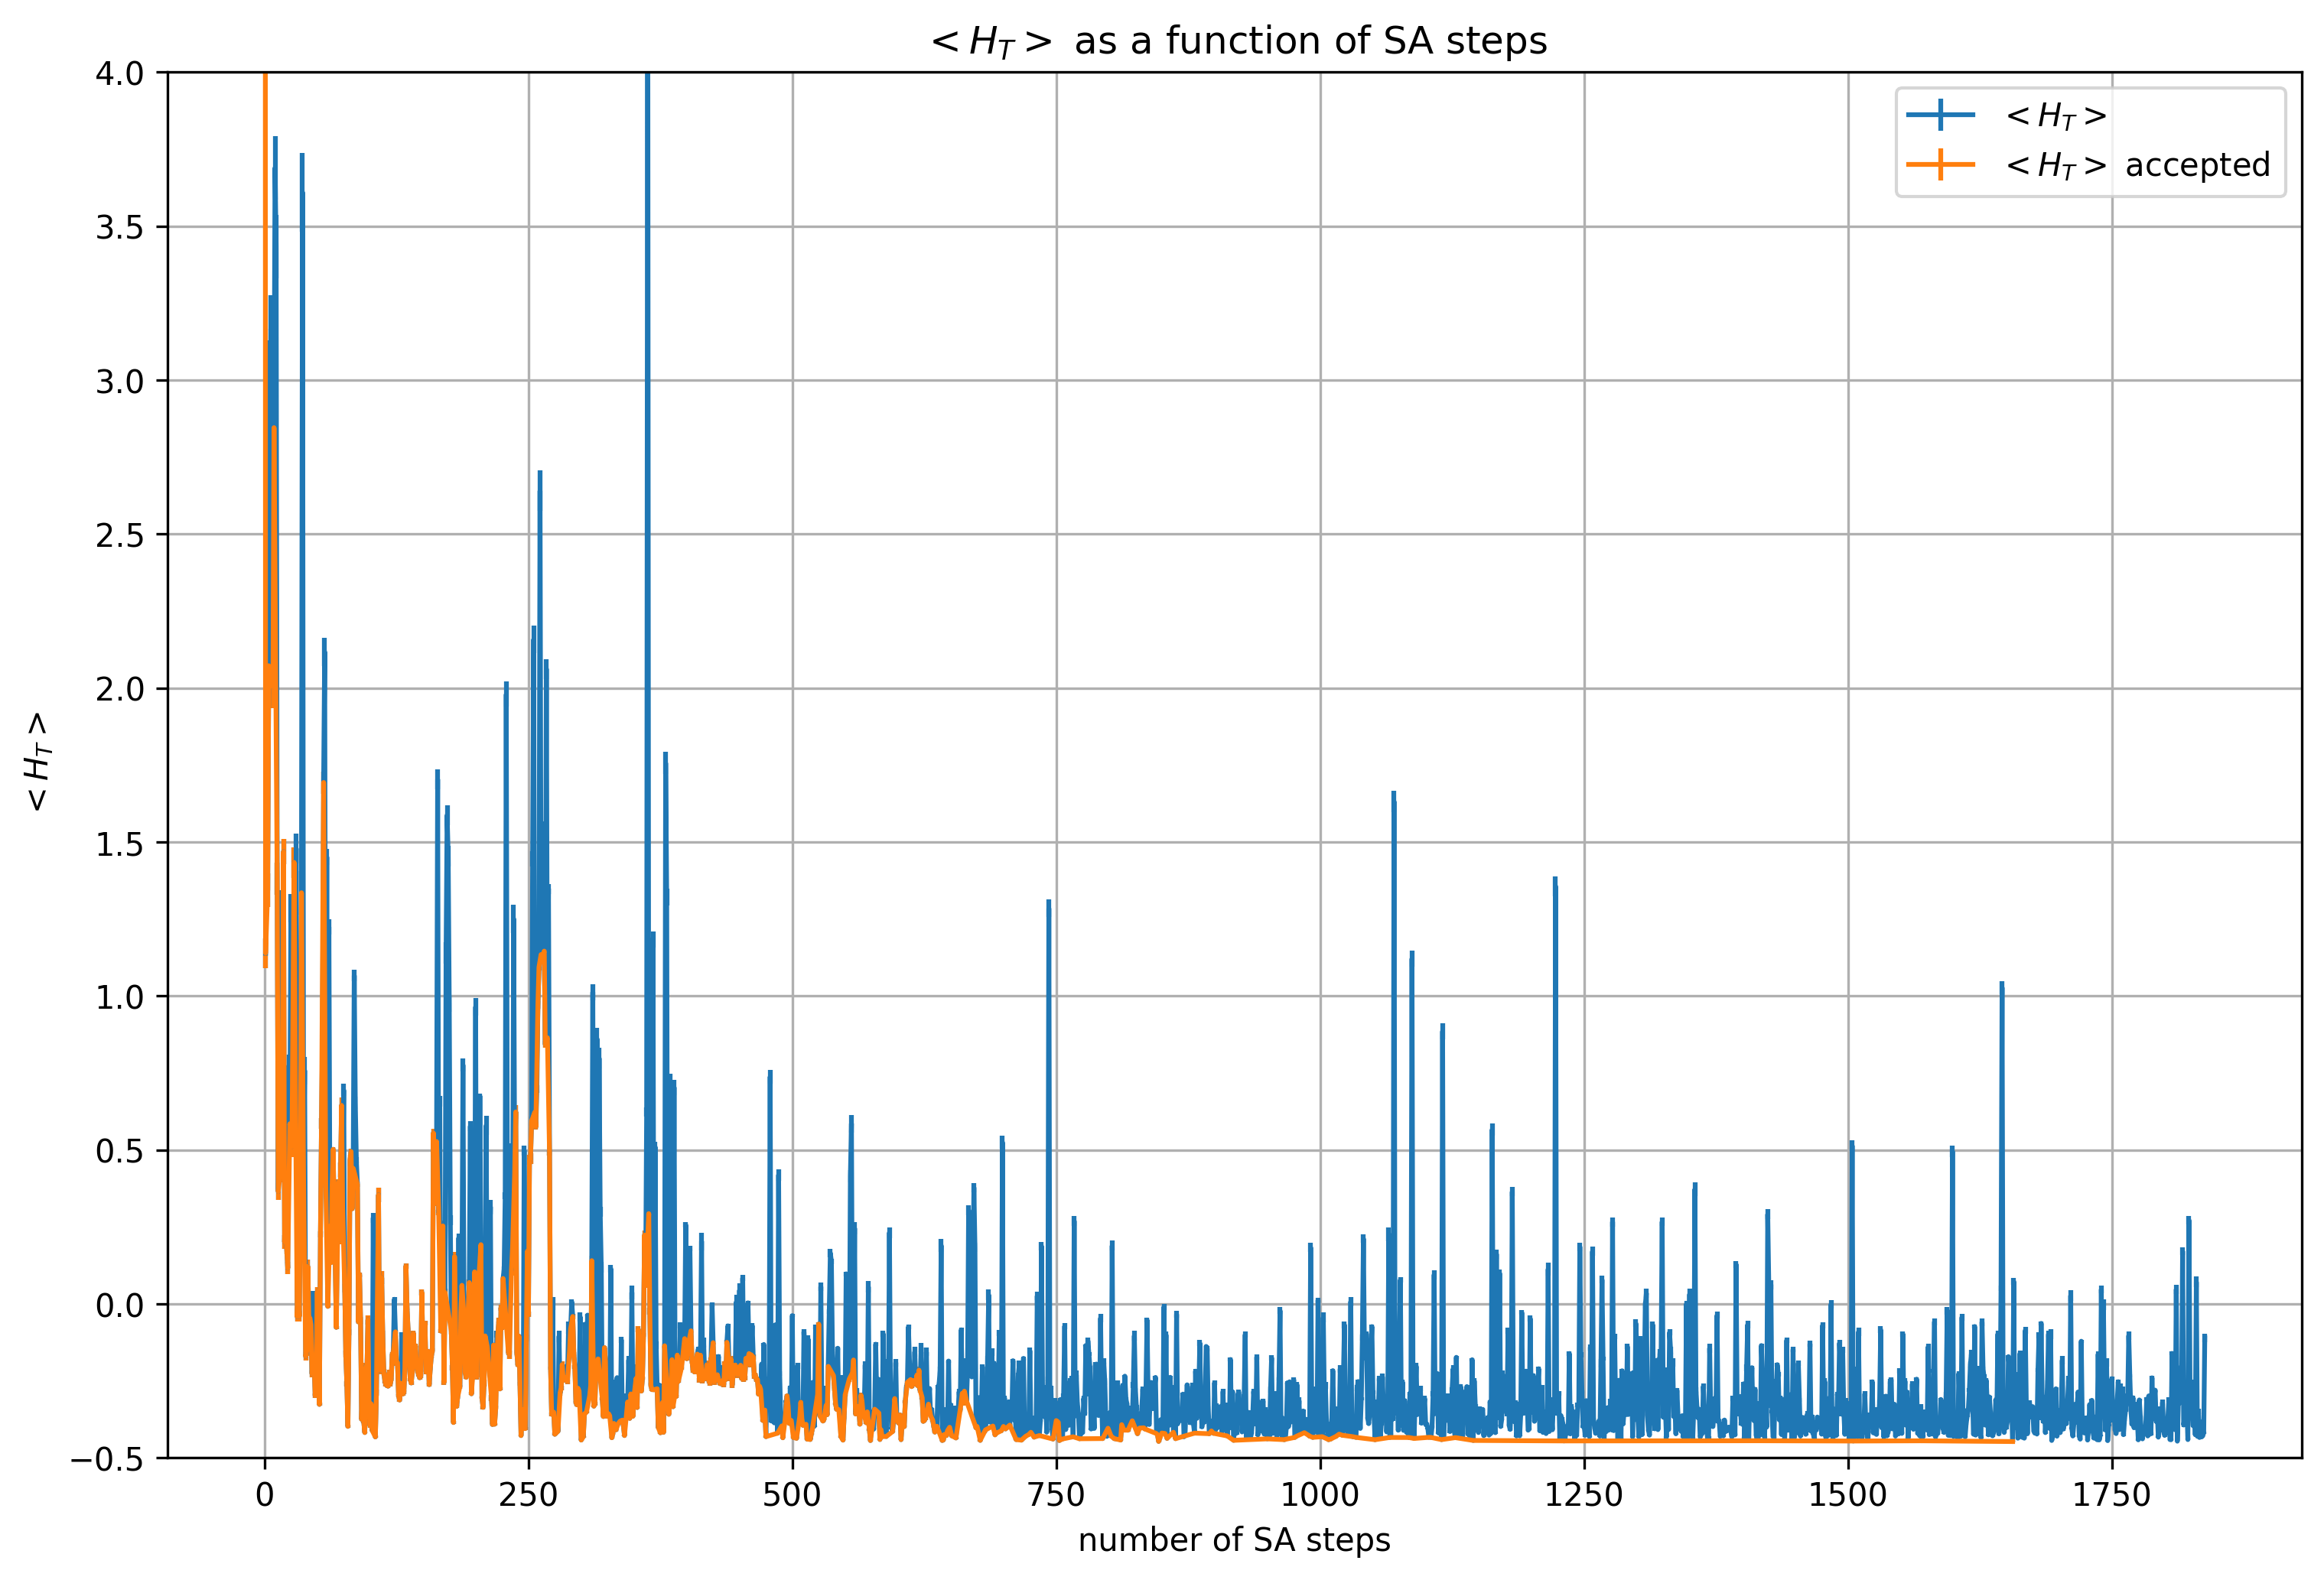

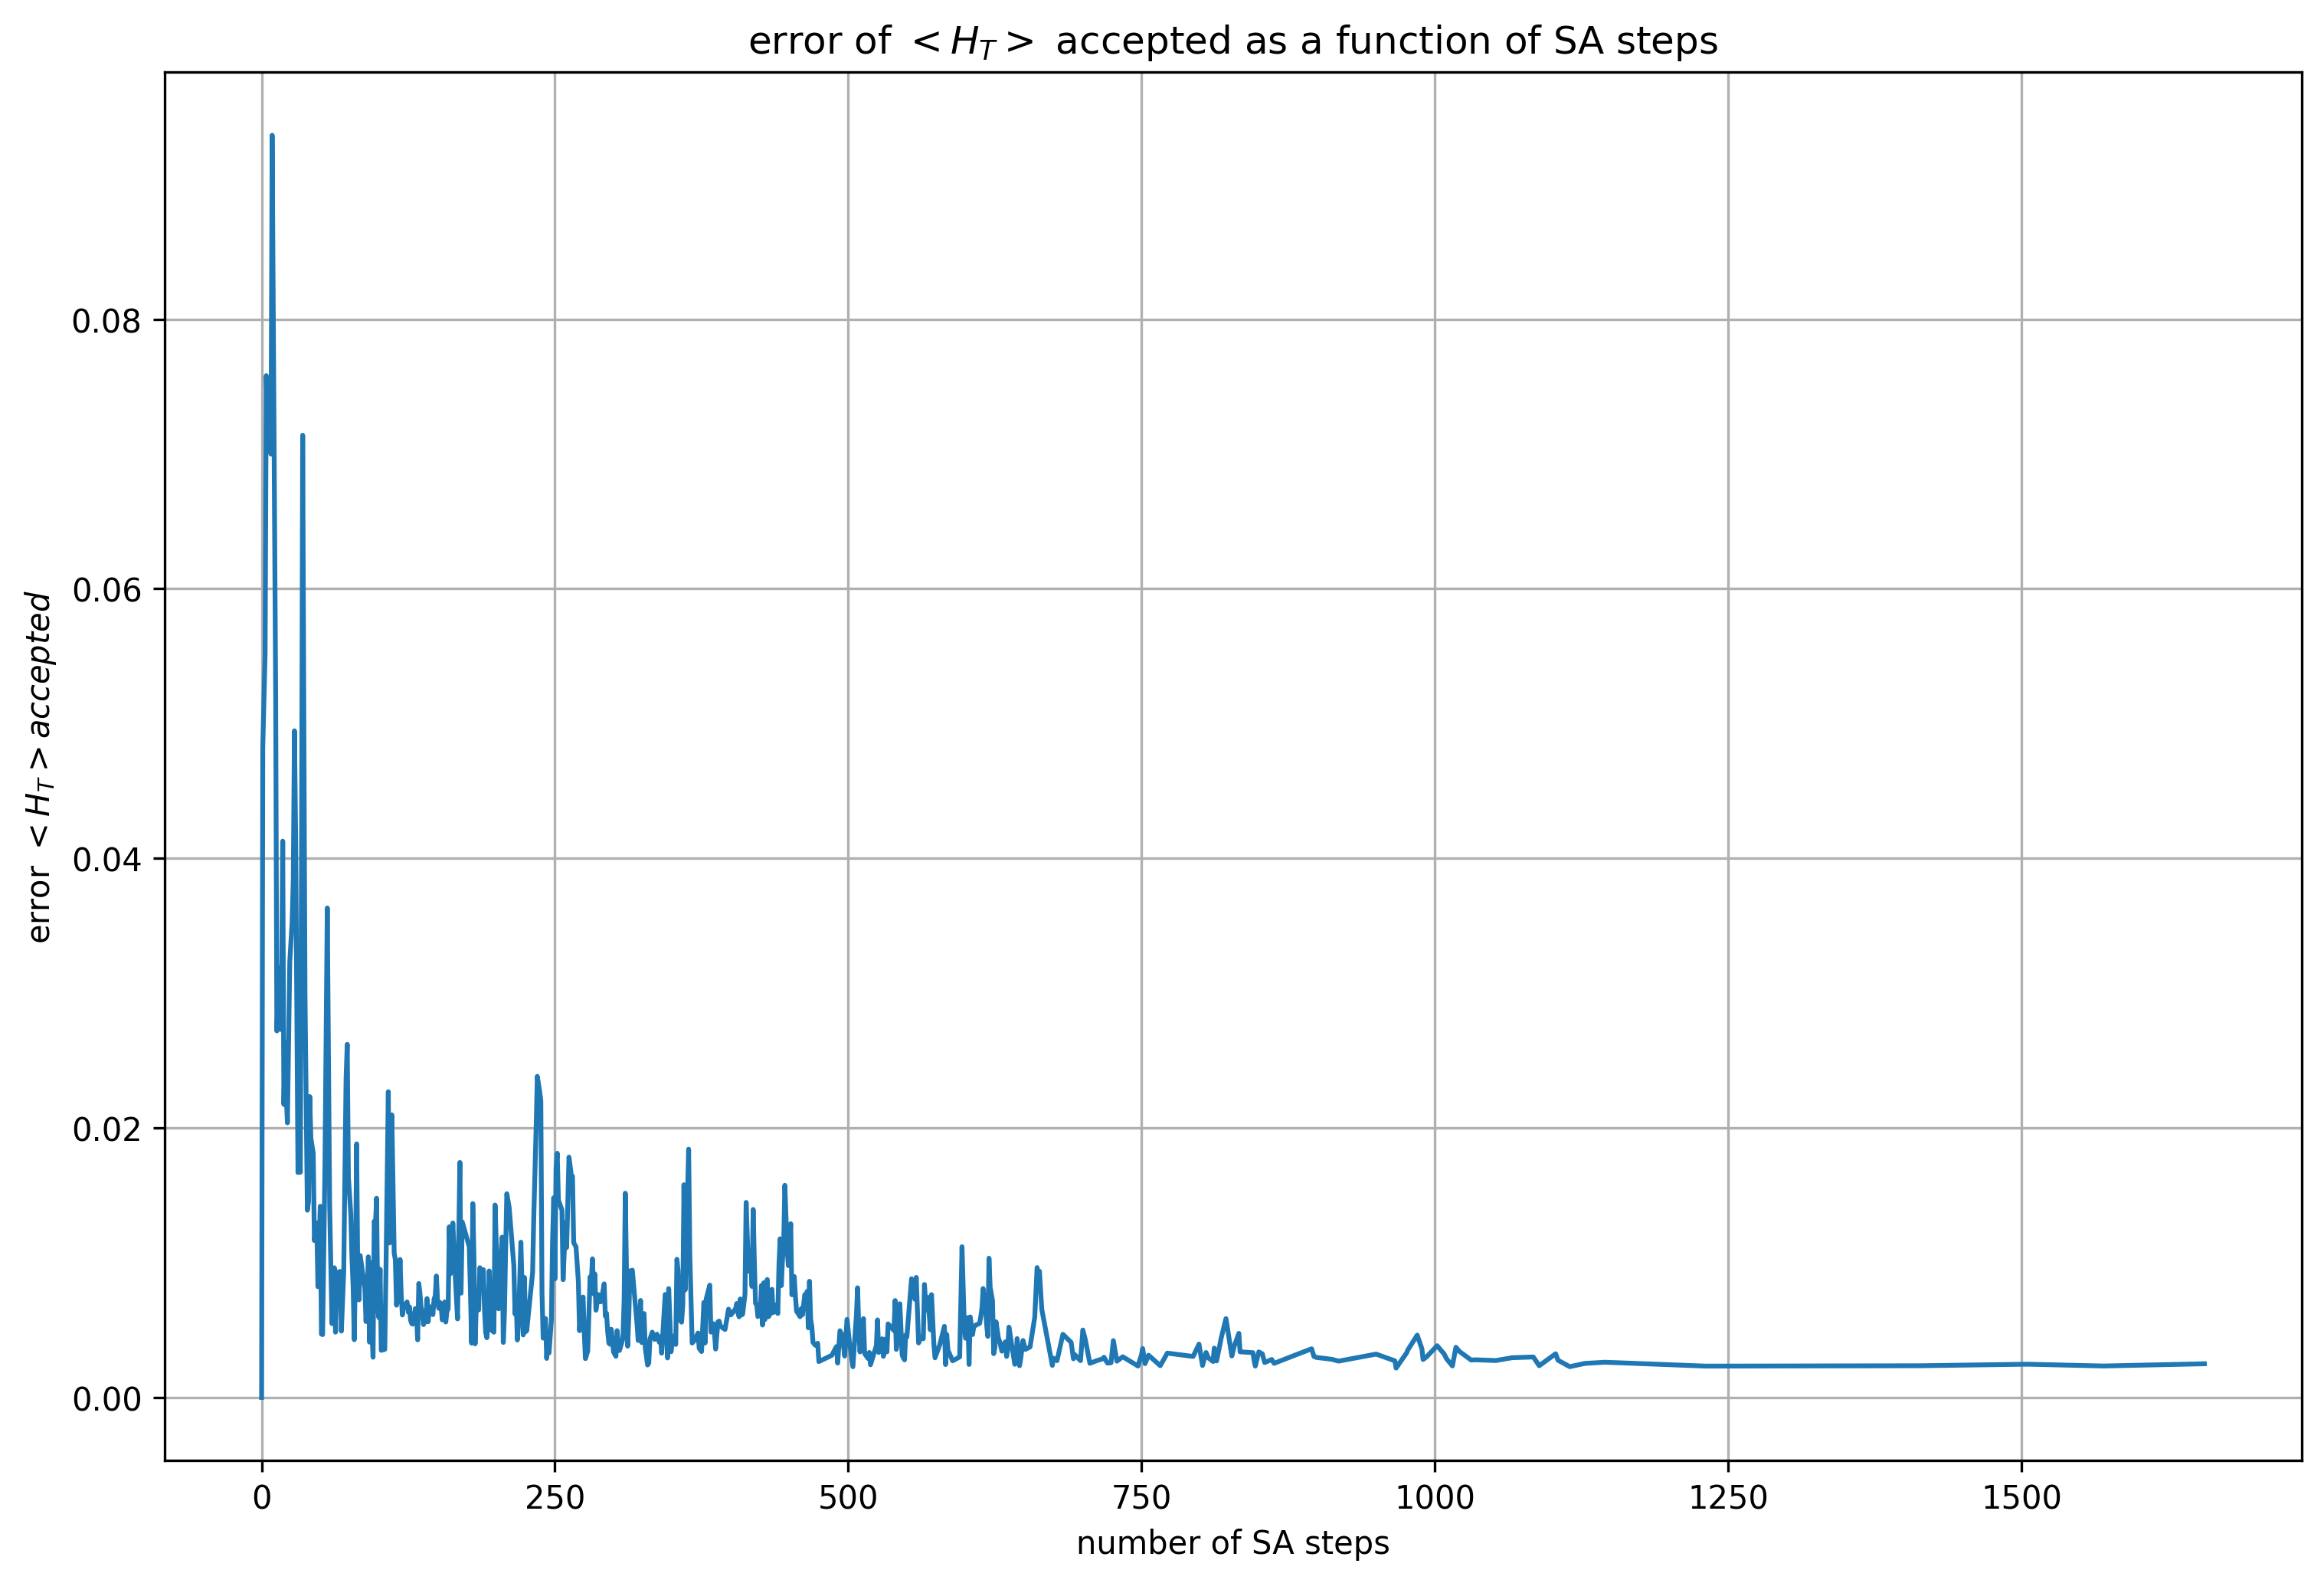

In [2]:
fig=plt.figure(figsize=(12,8),dpi=300)    
x,temp,mu,sigma,energy,err = np.loadtxt("8.1/1method/output_PossibleE.dat", usecols=(0,1,2,3,4,5), delimiter=' ', unpack='true')
plt.errorbar(x,energy,yerr=err,label ="$<H_T>$")
plt.xlabel('number of SA steps')
plt.ylabel('$< H_T >$')
plt.title("$<H_T>$ as a function of SA steps")
plt.ylim(-0.5,4)
 
x,temp,mu,sigma,energy,err = np.loadtxt("8.1/1method/output_OldData.dat", usecols=(0,1,2,3,4,5), delimiter=' ', unpack='true')
plt.errorbar(x,energy,yerr=err,label = "$<H_T>$ accepted ")
plt.legend()
plt.grid(True)
plt.show()
fig=plt.figure(figsize=(12,8),dpi=300)    
plt.plot(x,err)
plt.xlabel('number of SA steps')
plt.ylabel('error $< H_T > accepted$')
plt.title("error of $<H_T>$ accepted as a function of SA steps")

plt.grid(True)
plt.show()

In the previous plots, we notice that in general as the number of SA steps increases, the value of $<H_T>$ accepted decreases.
Furthermore, there is also a decrease of the statistical uncertainty of $<H_T>$ accepted.

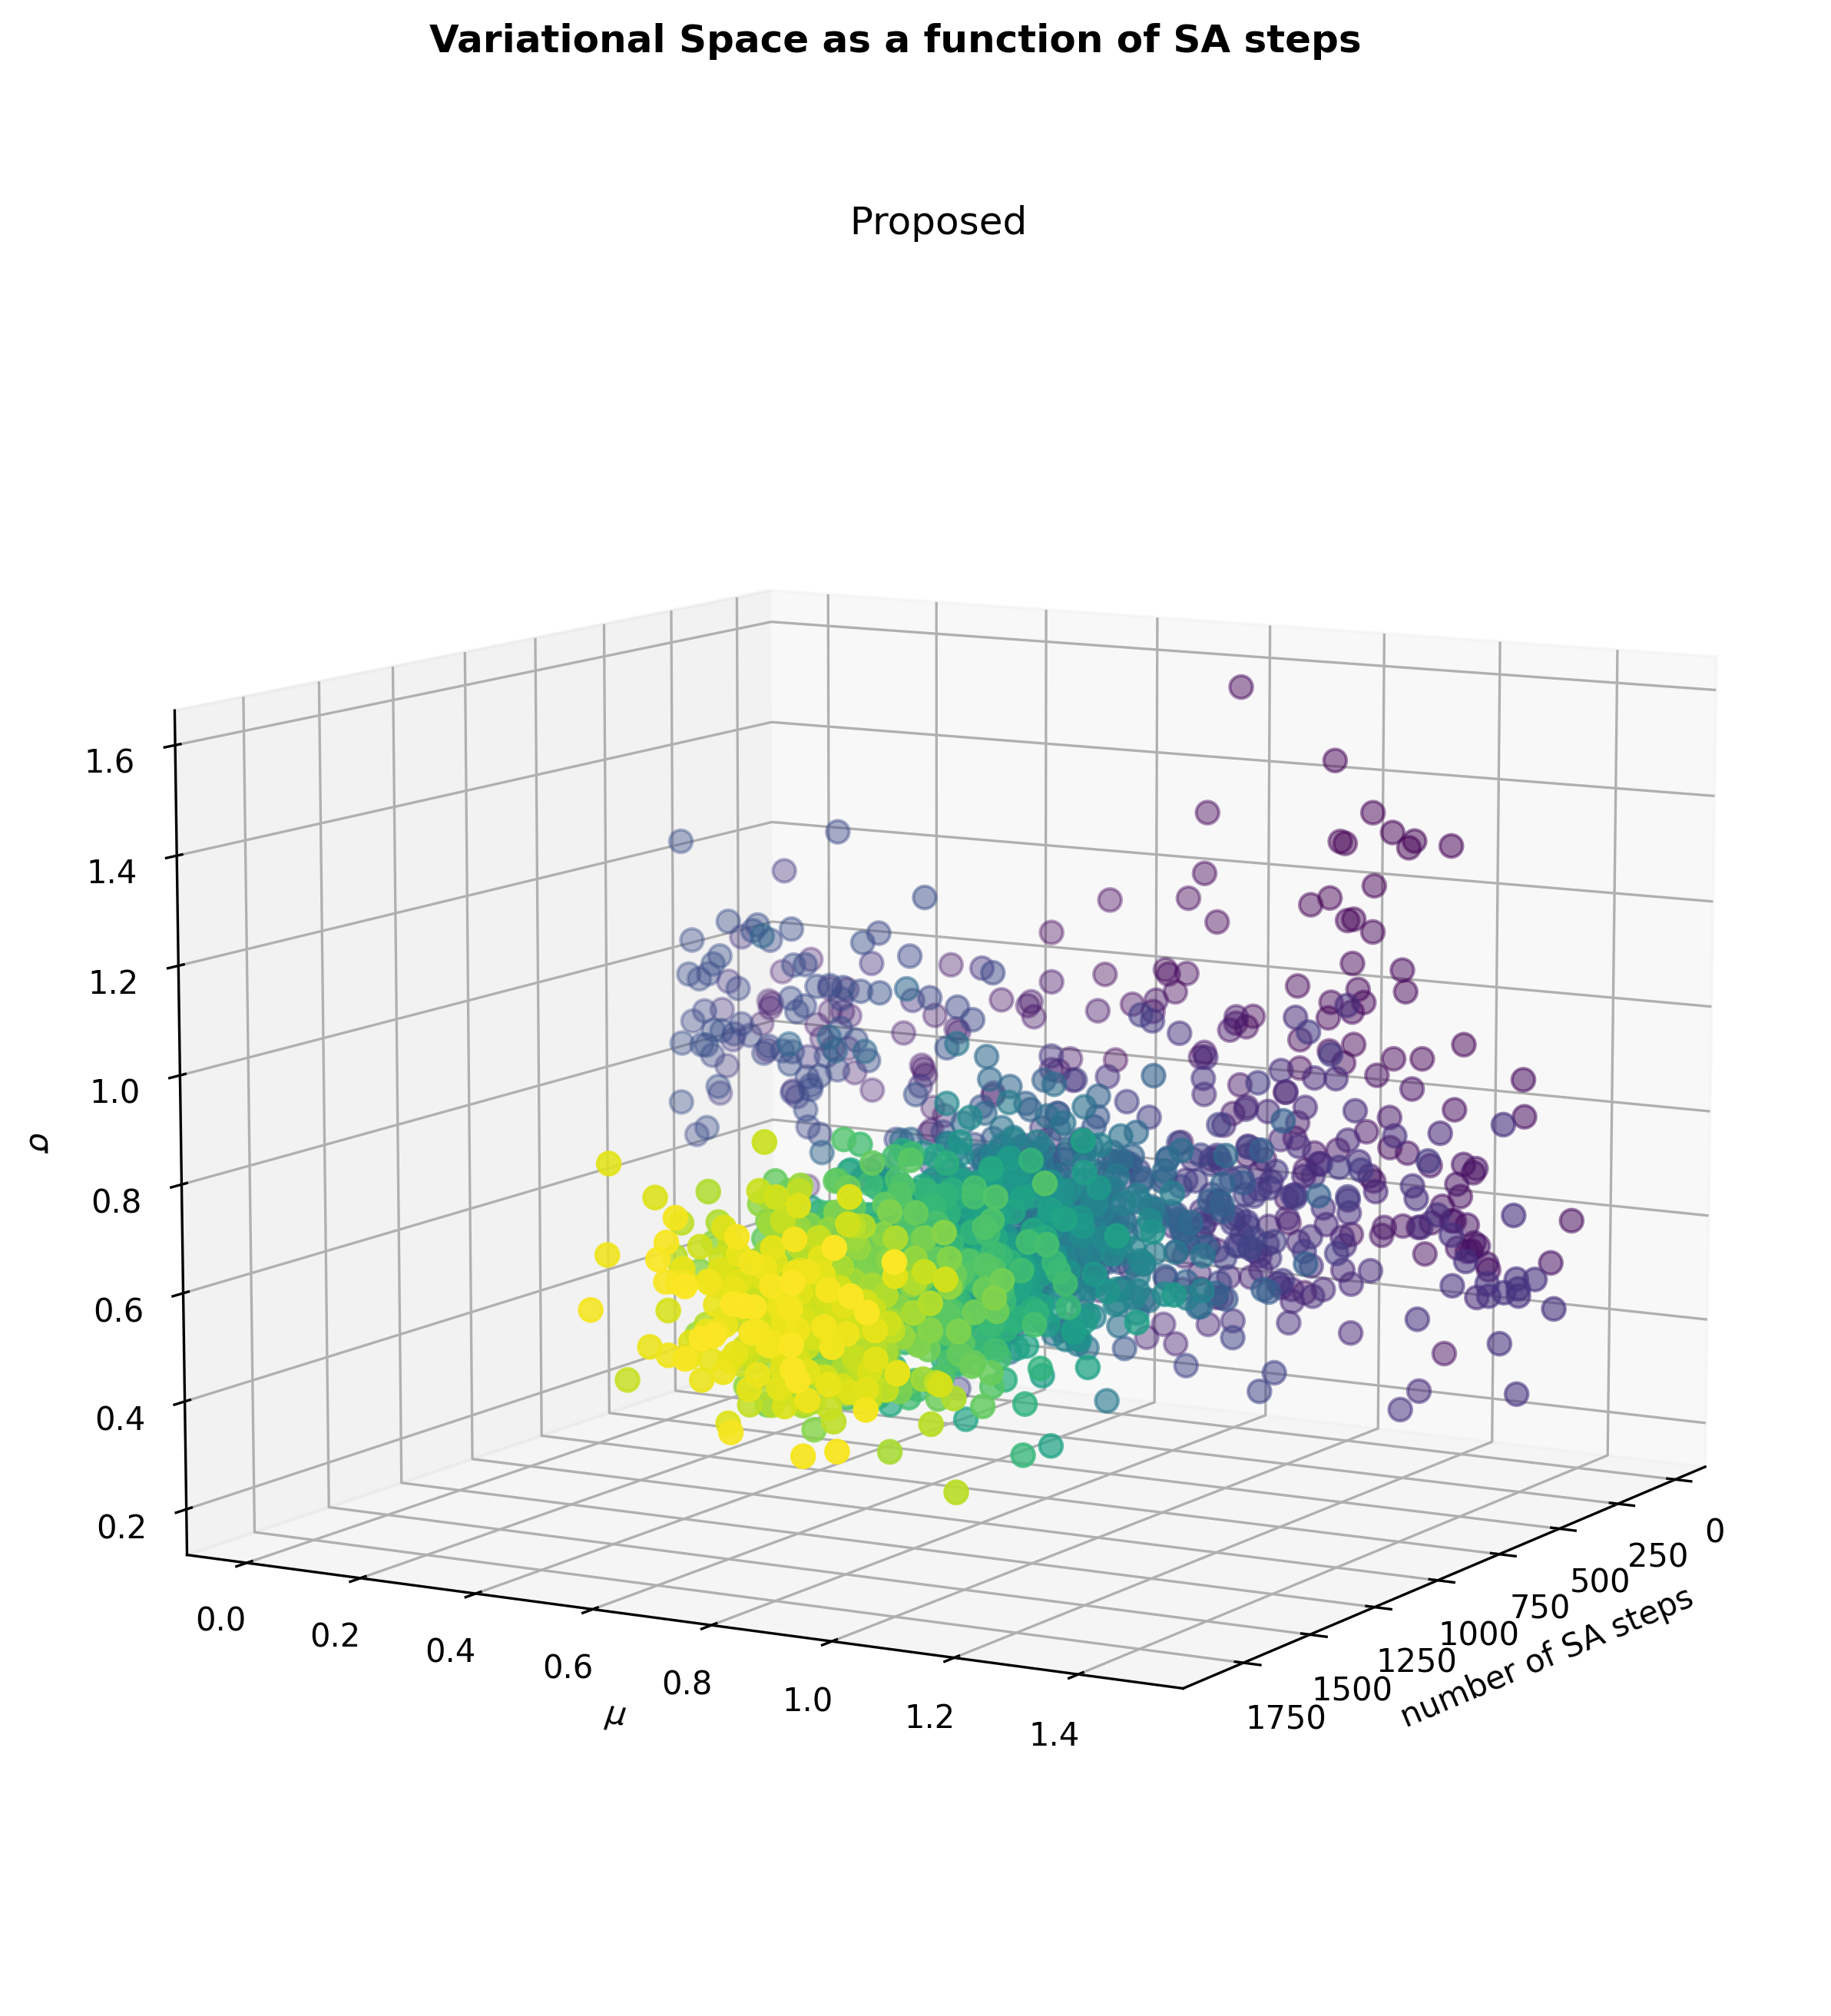

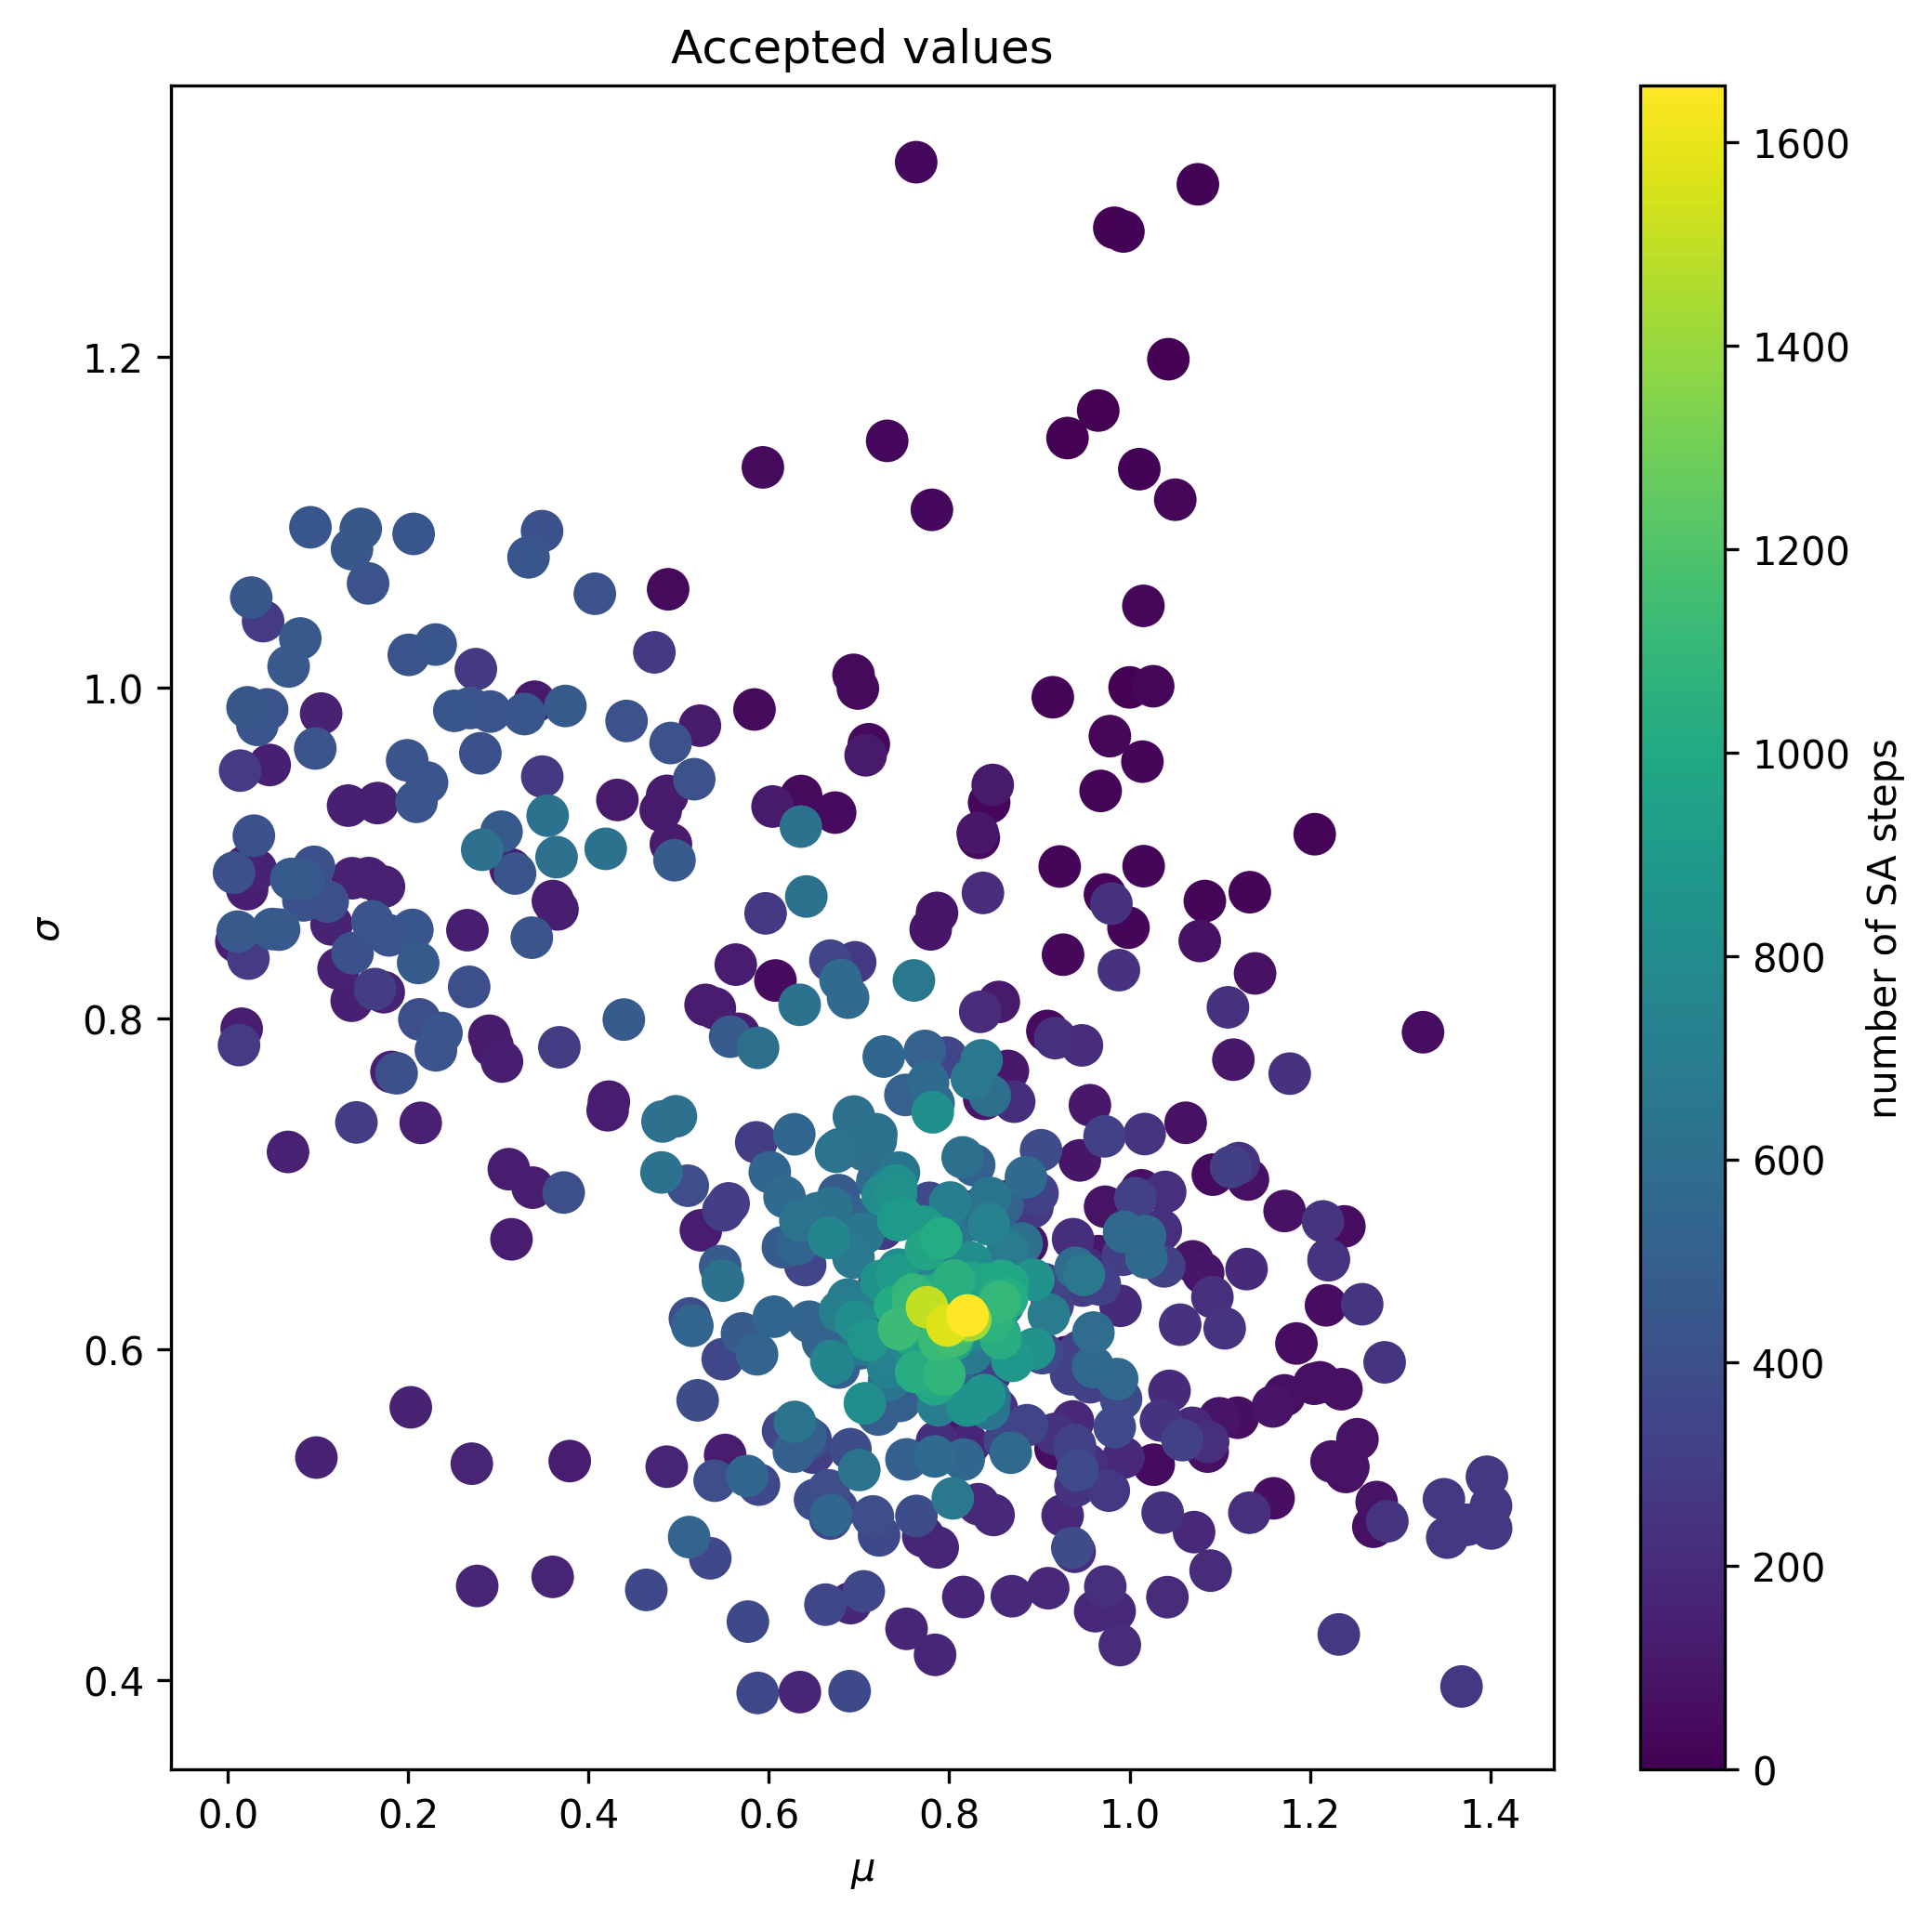

Last mu accepted :  0.820338
Best mu :  0.820338
Last sigma accepted :  0.620461
Best sigma :  0.620461


In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15,10),dpi=300)
plt.suptitle("Variational Space as a function of SA steps",weight="bold")
x,temp,mu,sigma,energy,err = np.loadtxt("8.1/1method/output_PossibleE.dat", usecols=(0,1,2,3,4,5), delimiter=' ', unpack='true')

ax = plt.axes( projection = "3d") 

ax.scatter(x, mu, sigma, c=x, marker='o',s=50)
ax.set_xlabel('number of SA steps')
ax.set_ylabel('$\mu$')
ax.set_zlabel('$\sigma$')
ax.view_init(10, 30)
plt.title(" Proposed ")

plt.show()

x,temp,mu,sigma,energy,err = np.loadtxt("8.1/1method/output_OldData.dat", usecols=(0,1,2,3,4,5), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8),dpi=300)
sc=plt.scatter(mu, sigma, c=x,s=100)
plt.title("Accepted values")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
fig.colorbar(sc,label="number of SA steps")
plt.show()
sigmaBest,muBest = np.loadtxt("8.1/1method/best.dat", usecols=(3,8), delimiter=' ', unpack='true')
print("Last mu accepted : ",muBest[0])
print("Best mu : ",muBest[1])
print("Last sigma accepted : ",sigmaBest[0])
print("Best sigma : ",sigmaBest[1])

With the best parameters returned by the algorithm, we apply the *Data Blocking* method to calculate a more precise value of $<H_T>$ with:
- number of block: $N=100$;
- number of steps in each block: $L=10000$

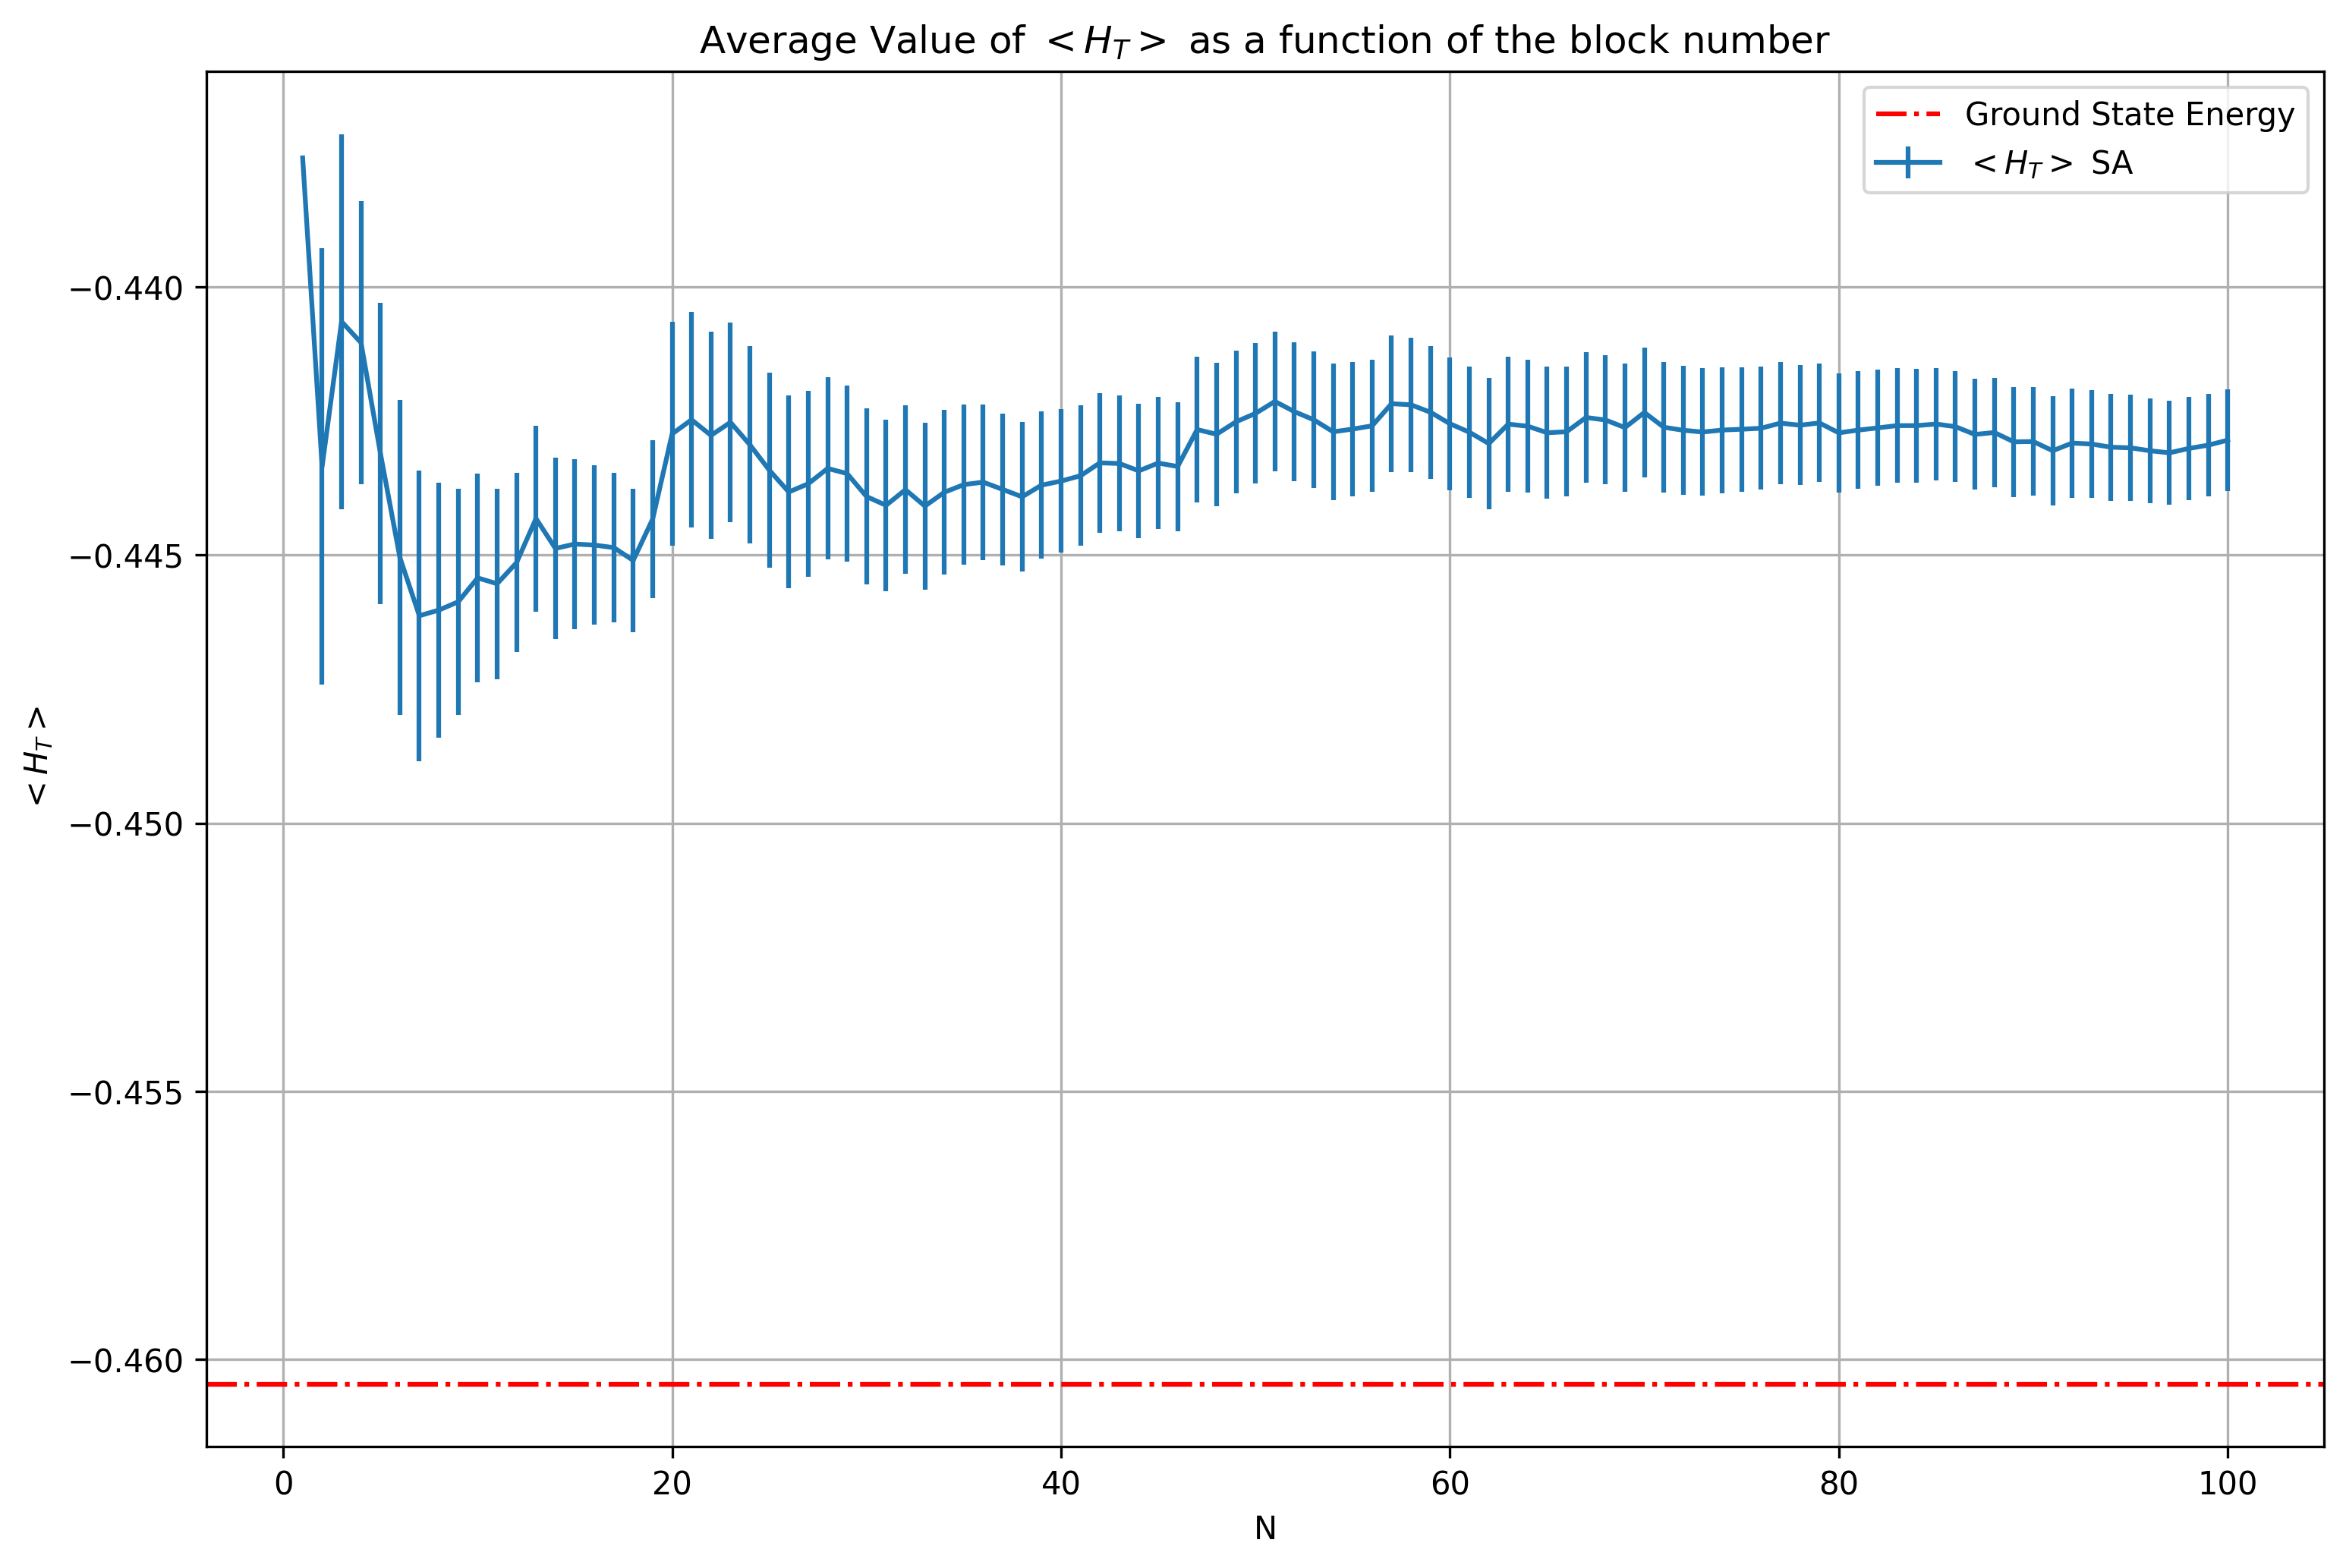

Ground state energy for N=100:  -0.442855 +- 0.000949464
Ground state energy numerical value :  -0.46046587969271563


In [4]:
fig=plt.figure(figsize=(12,8),dpi=300)    
x,y,energy,err = np.loadtxt("8.1/1method/output_energy.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
plt.errorbar(x,energy,yerr=err,label = "$<H_T>$ SA ")

plt.xlabel('N')
plt.ylabel('$<H_T>$')
plt.axhline(y=-0.46046587969271563, color='r', linestyle='-.',label="Ground State Energy")
plt.title("Average Value of $<H_T>$ as a function of the block number ")
plt.grid(True)
plt.legend()
plt.show()
print("Ground state energy for N=100: ",energy[-1],"+-",err[-1])
print("Ground state energy numerical value : ", -0.46046587969271563)


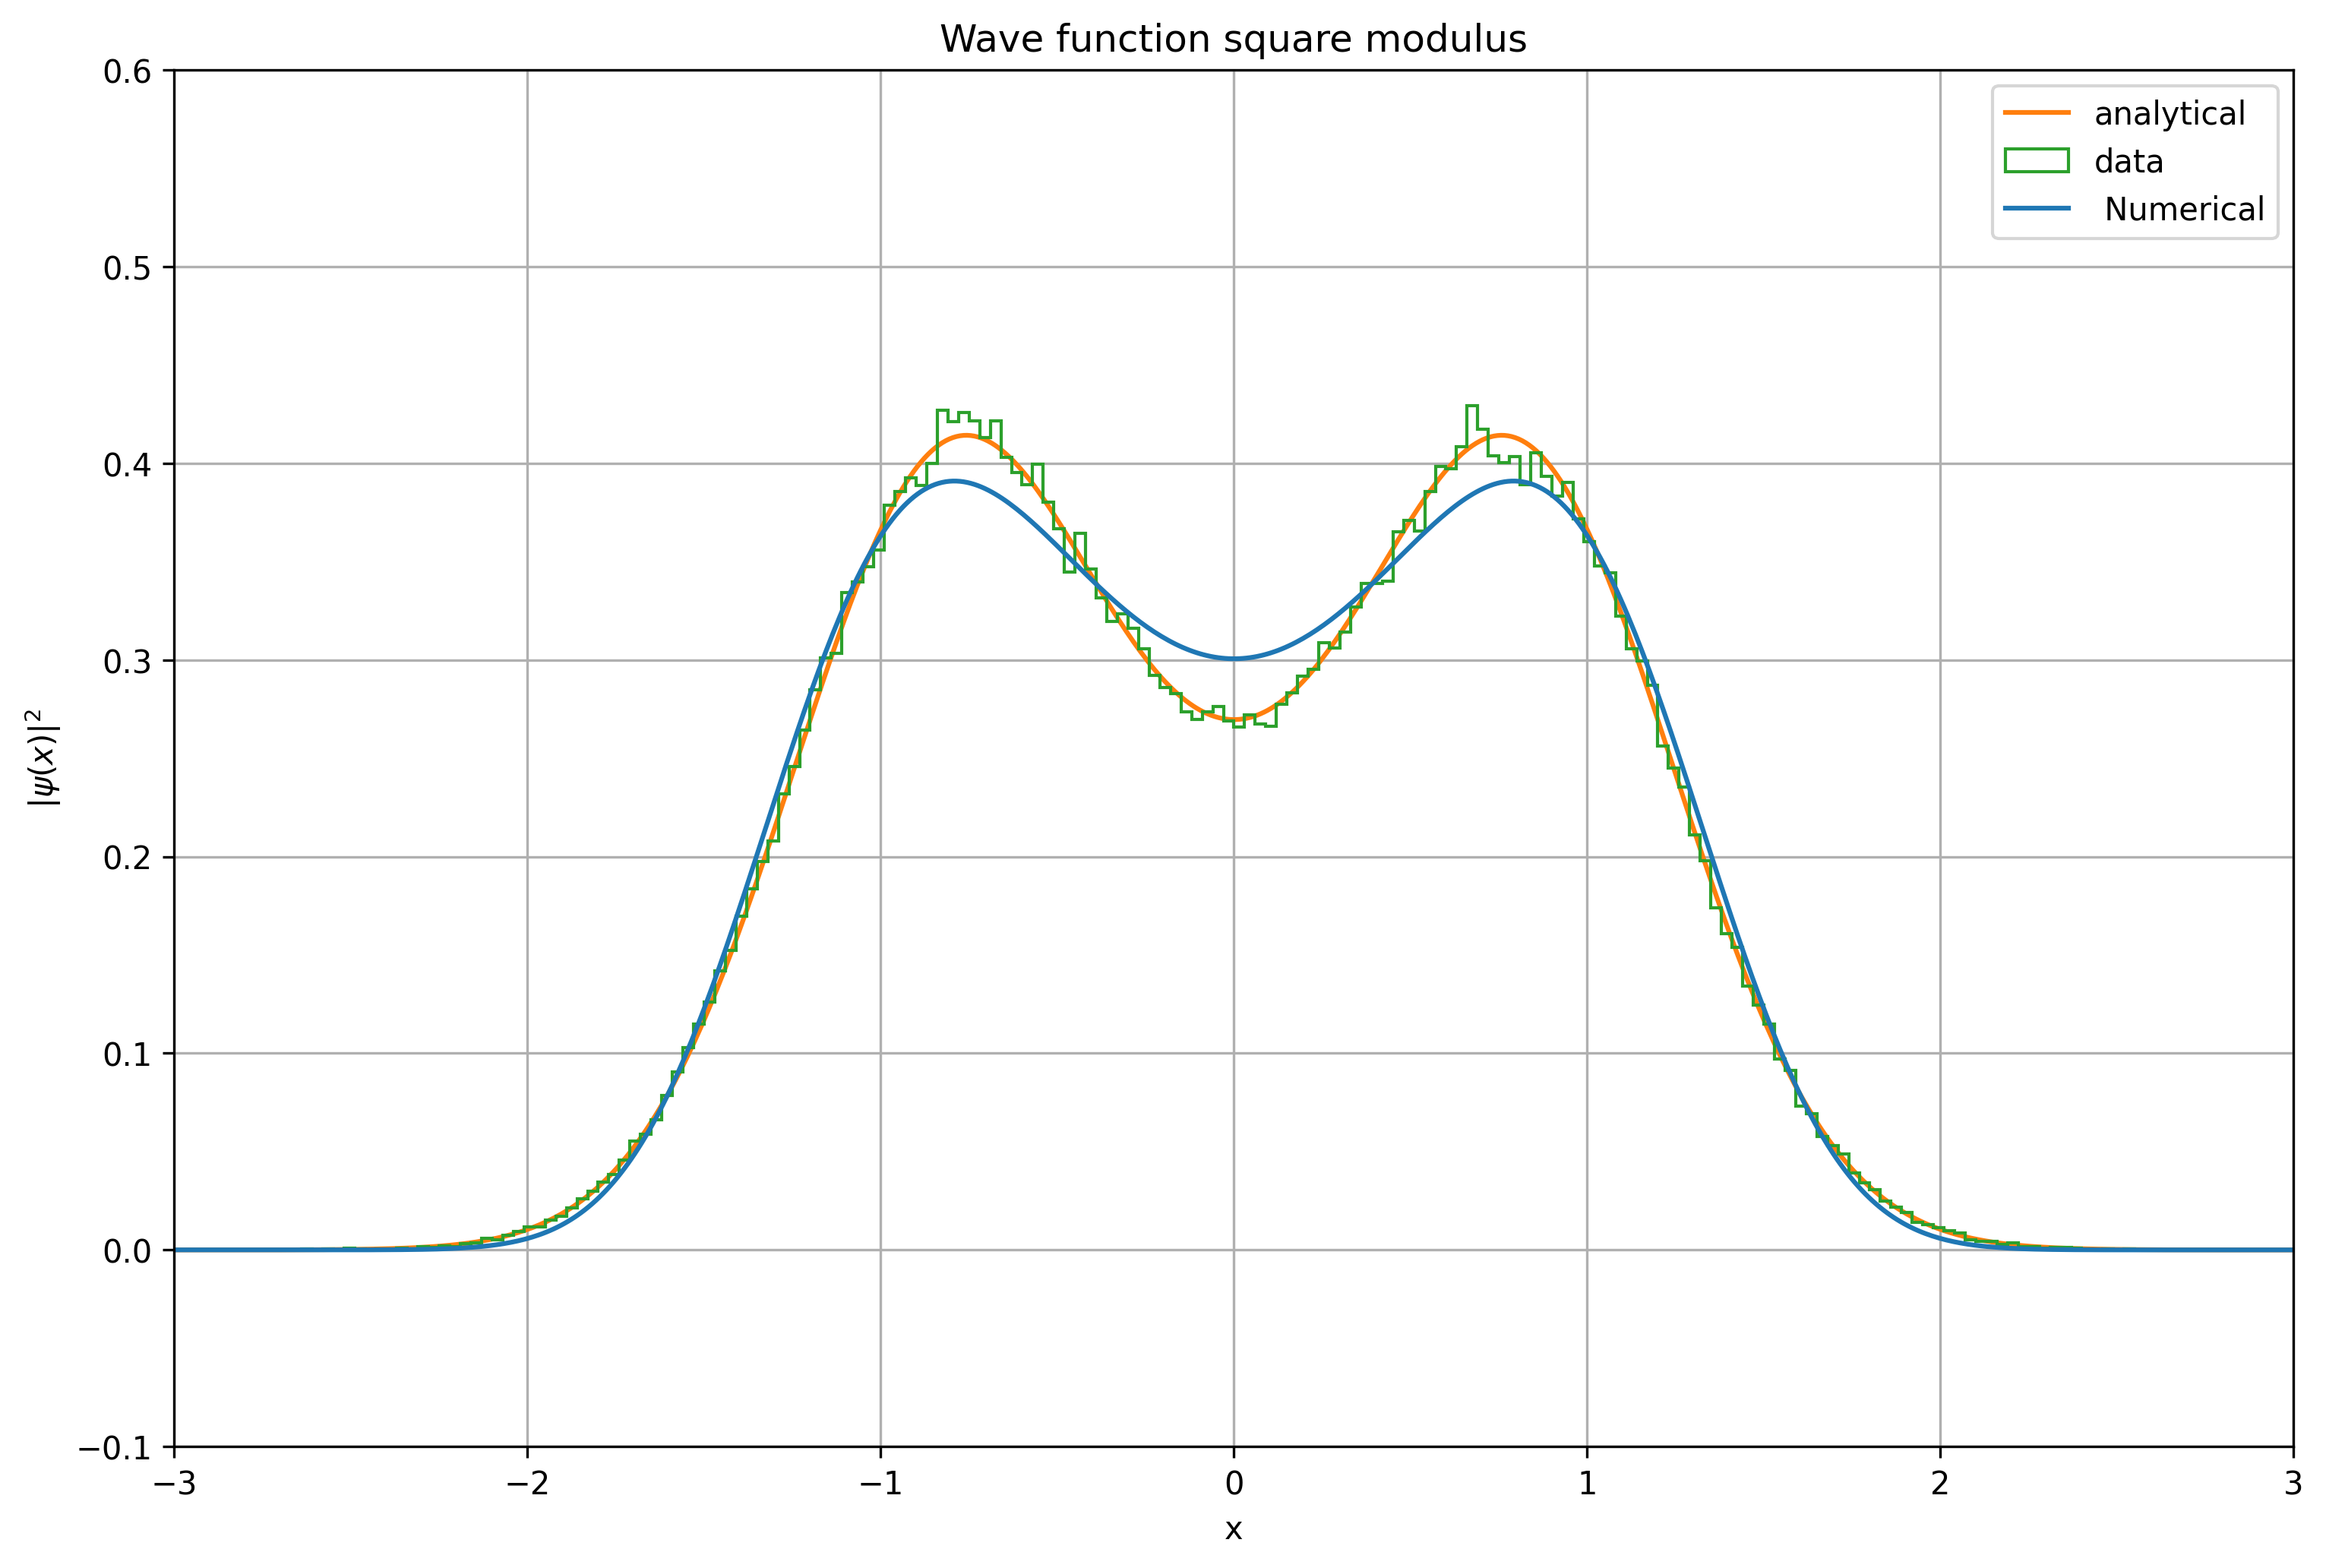

In [5]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def psi_analytical(x, mu, sigma):
    a = np.exp( - (x-mu)**2./(2.*sigma**2.) ) + np.exp( - (x+mu)**2./(2.*sigma**2.) ) 
    return  a


hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)



# Plot a few things
fig=plt.figure(figsize=(12,8),dpi=300)    
plt.errorbar(x,(psi[0])**2,label=" Numerical")

sigma,mu = np.loadtxt("8.1/1method/best.dat", usecols=(3,8), delimiter=' ', unpack='true')
psi = psi_analytical(x, mu[-1], sigma[-1])
int_psi_square = scipy.integrate.simps(abs(psi) ** 2, x)
psi=psi/np.sqrt(int_psi_square)
plt.plot(x,psi**2,label="analytical")


#x,y, f,err = np.loadtxt("8.1/1method/output_gofr.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
#plt.errorbar(x,f,yerr=err,label = "data",marker="o",linestyle="none")
r=np.loadtxt("8.1/1method/output_gofr1.dat", usecols=(0), delimiter=' ', unpack='true')
plt.hist(r,200,range=(-3,+3),density=True,histtype = "step",label = "data")




plt.legend()
plt.title("Wave function square modulus")
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.1,0.6))

plt.show()




It is clear that the energies measured with the SA and the numerical method are incompatible.
This discrepancy could be caused by the discretization of the wave function and the approximations to calculate the second derivative of $\psi(x)$ in the numerical method or the values of $\mu$ and $\sigma$ found in the SA algorithm are not optimal. 

As expected from the previous results, the wave function obtained from the numerical method is not compatible with the analytical wavefunction and the histogram of the sampled configurations.